In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


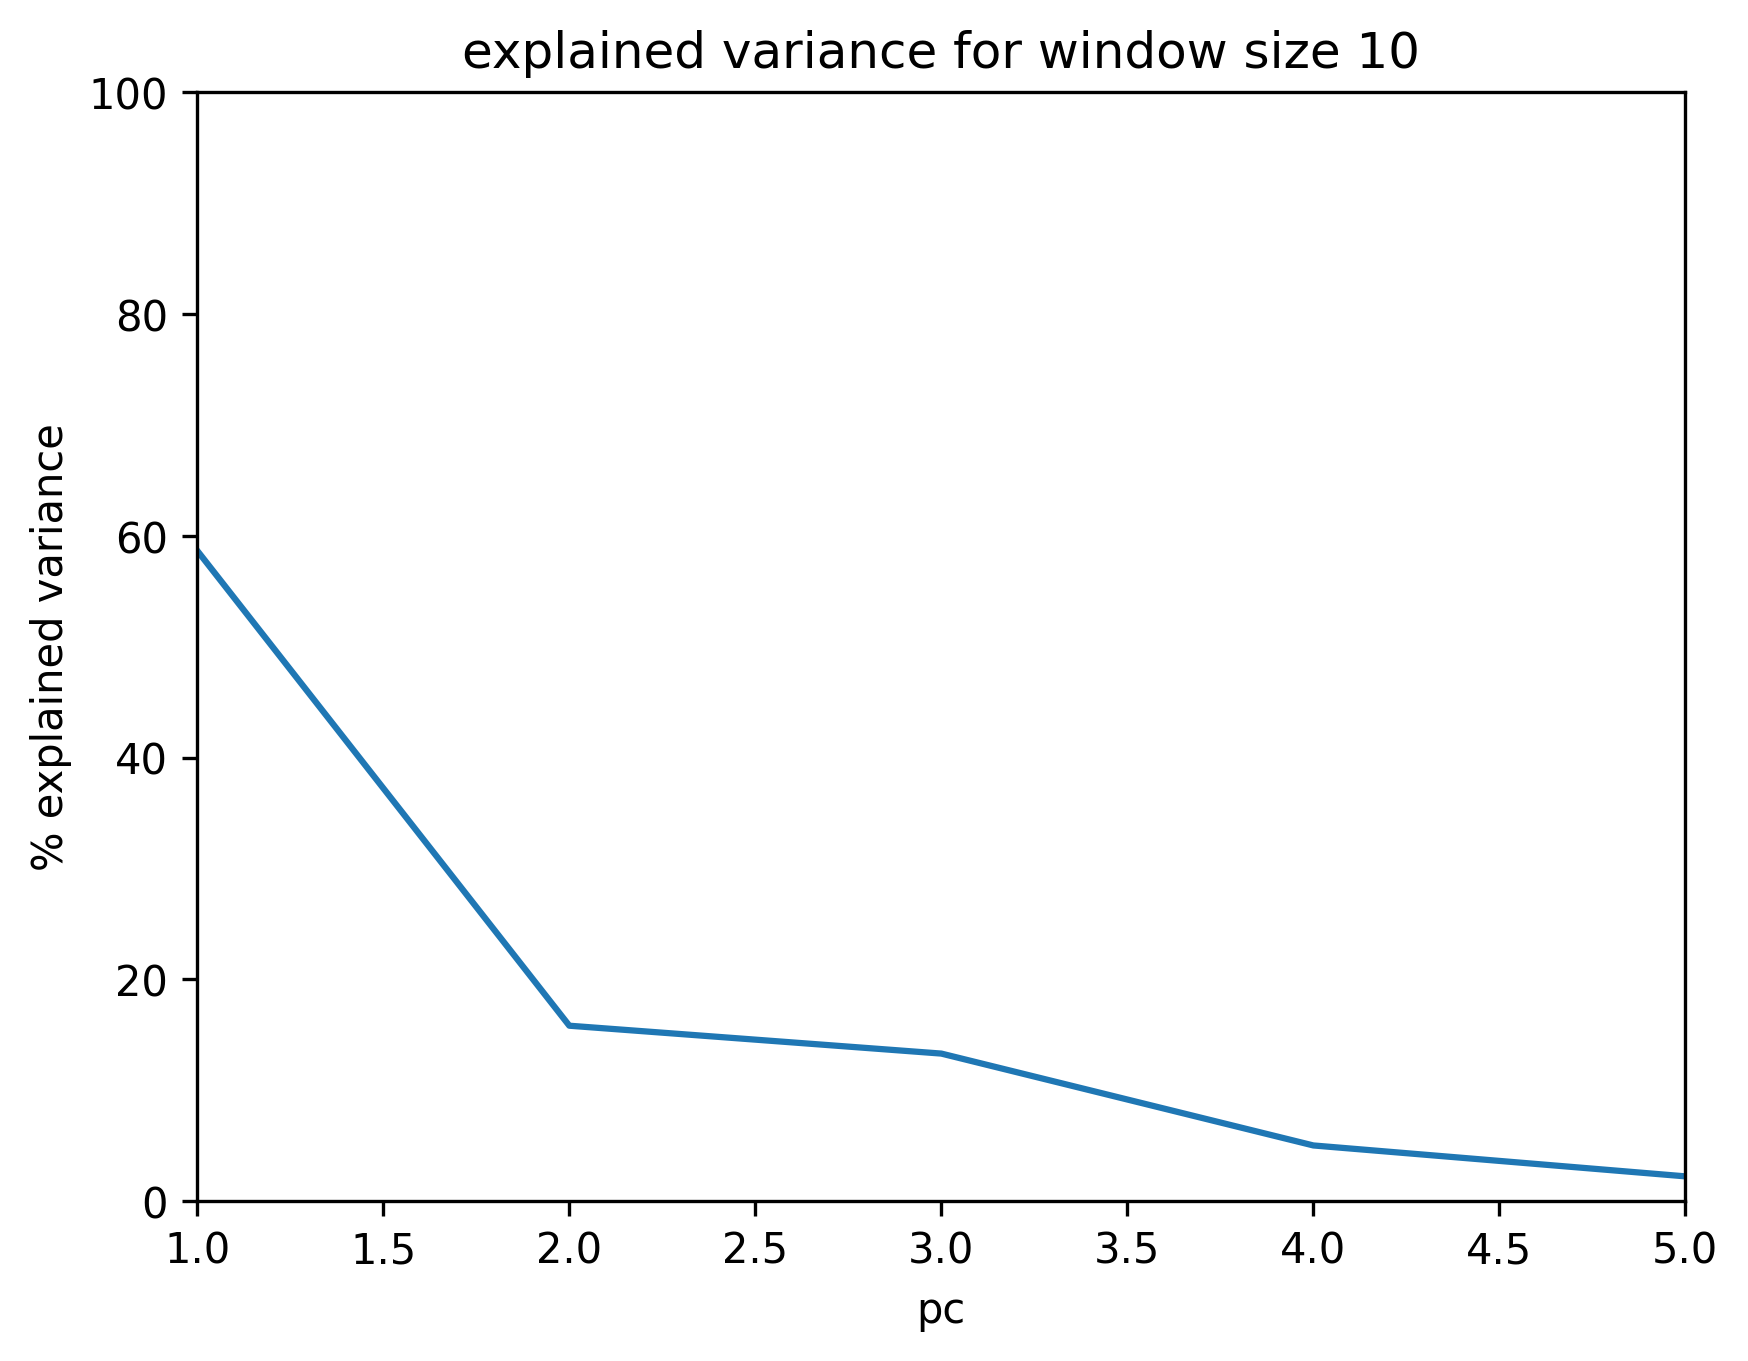

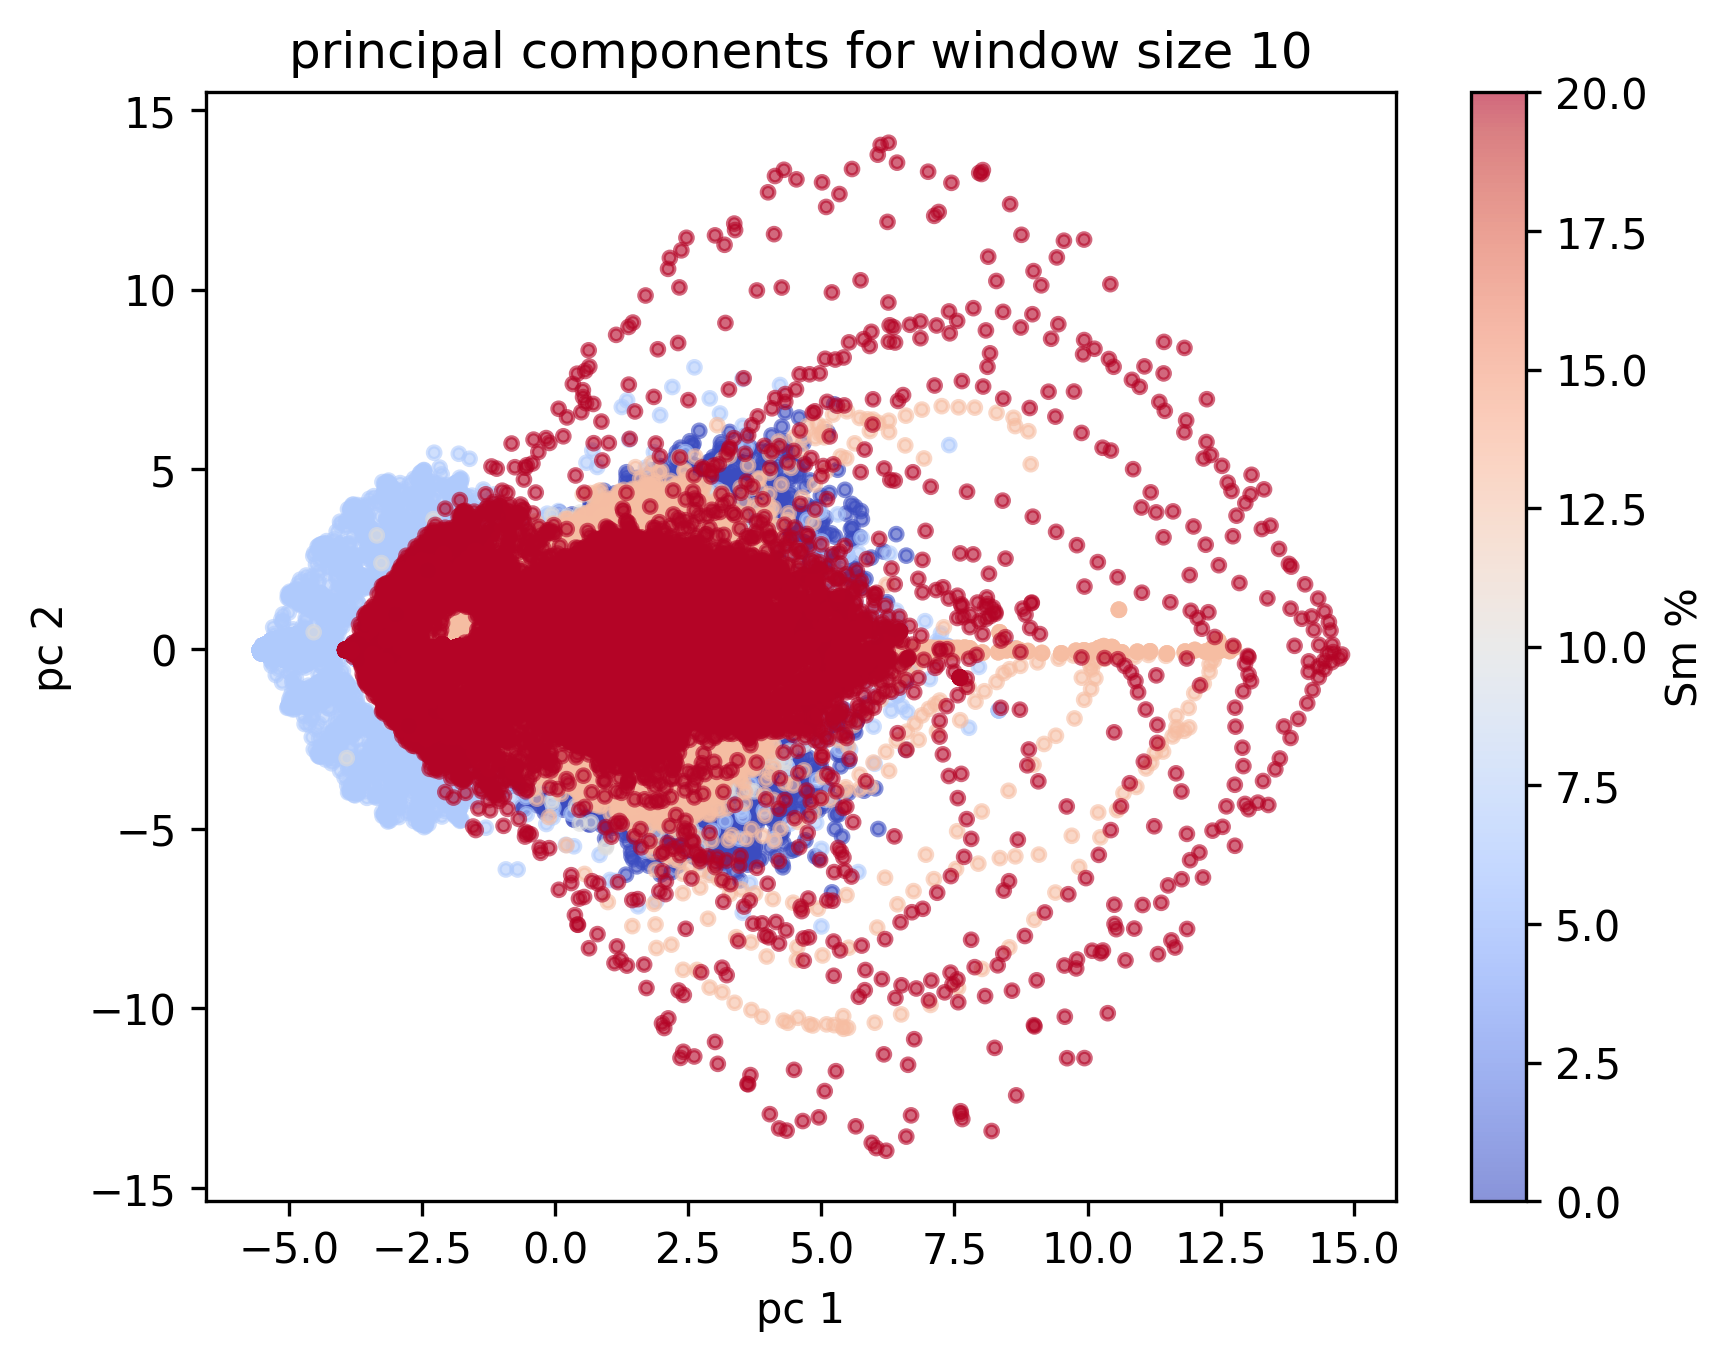

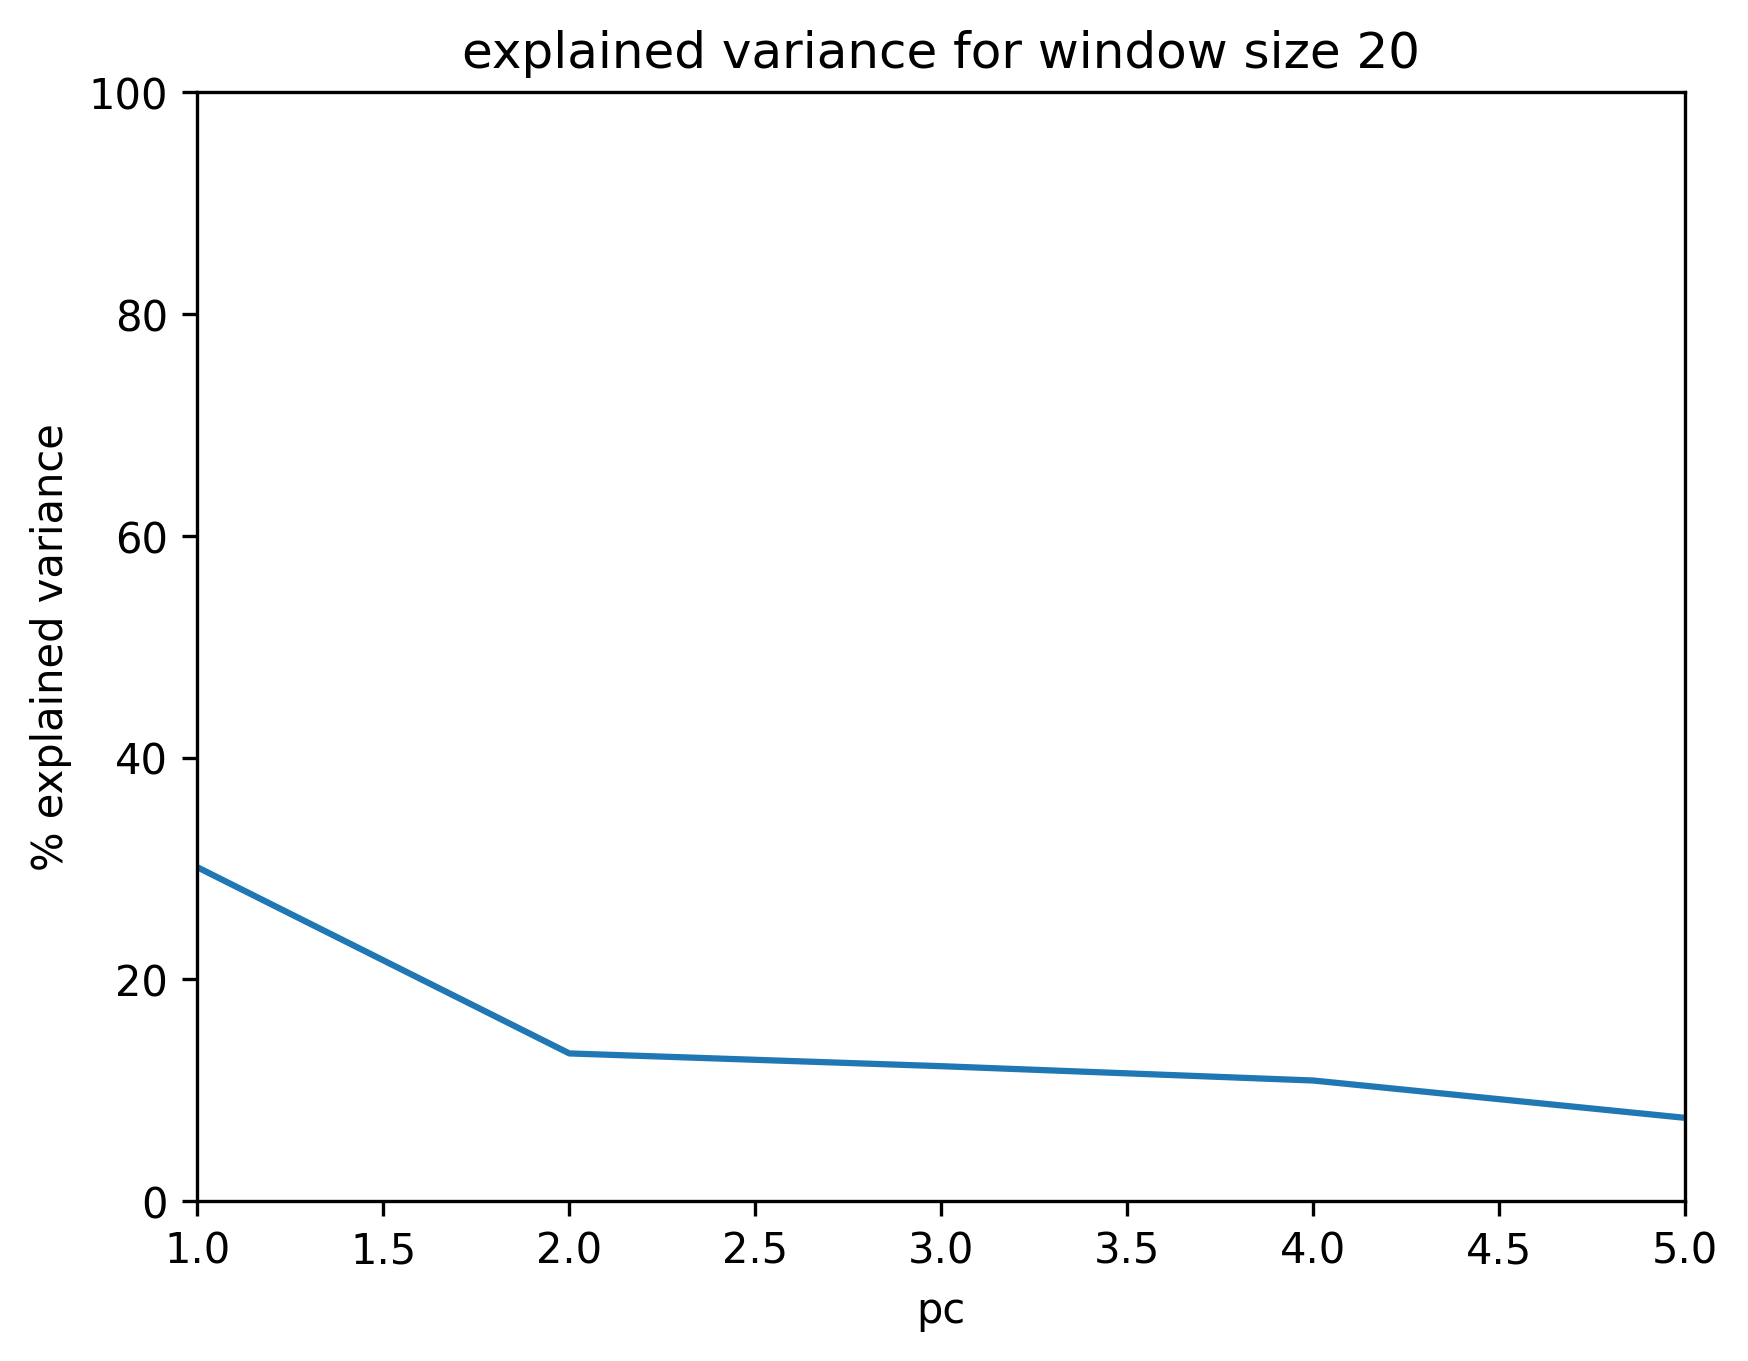

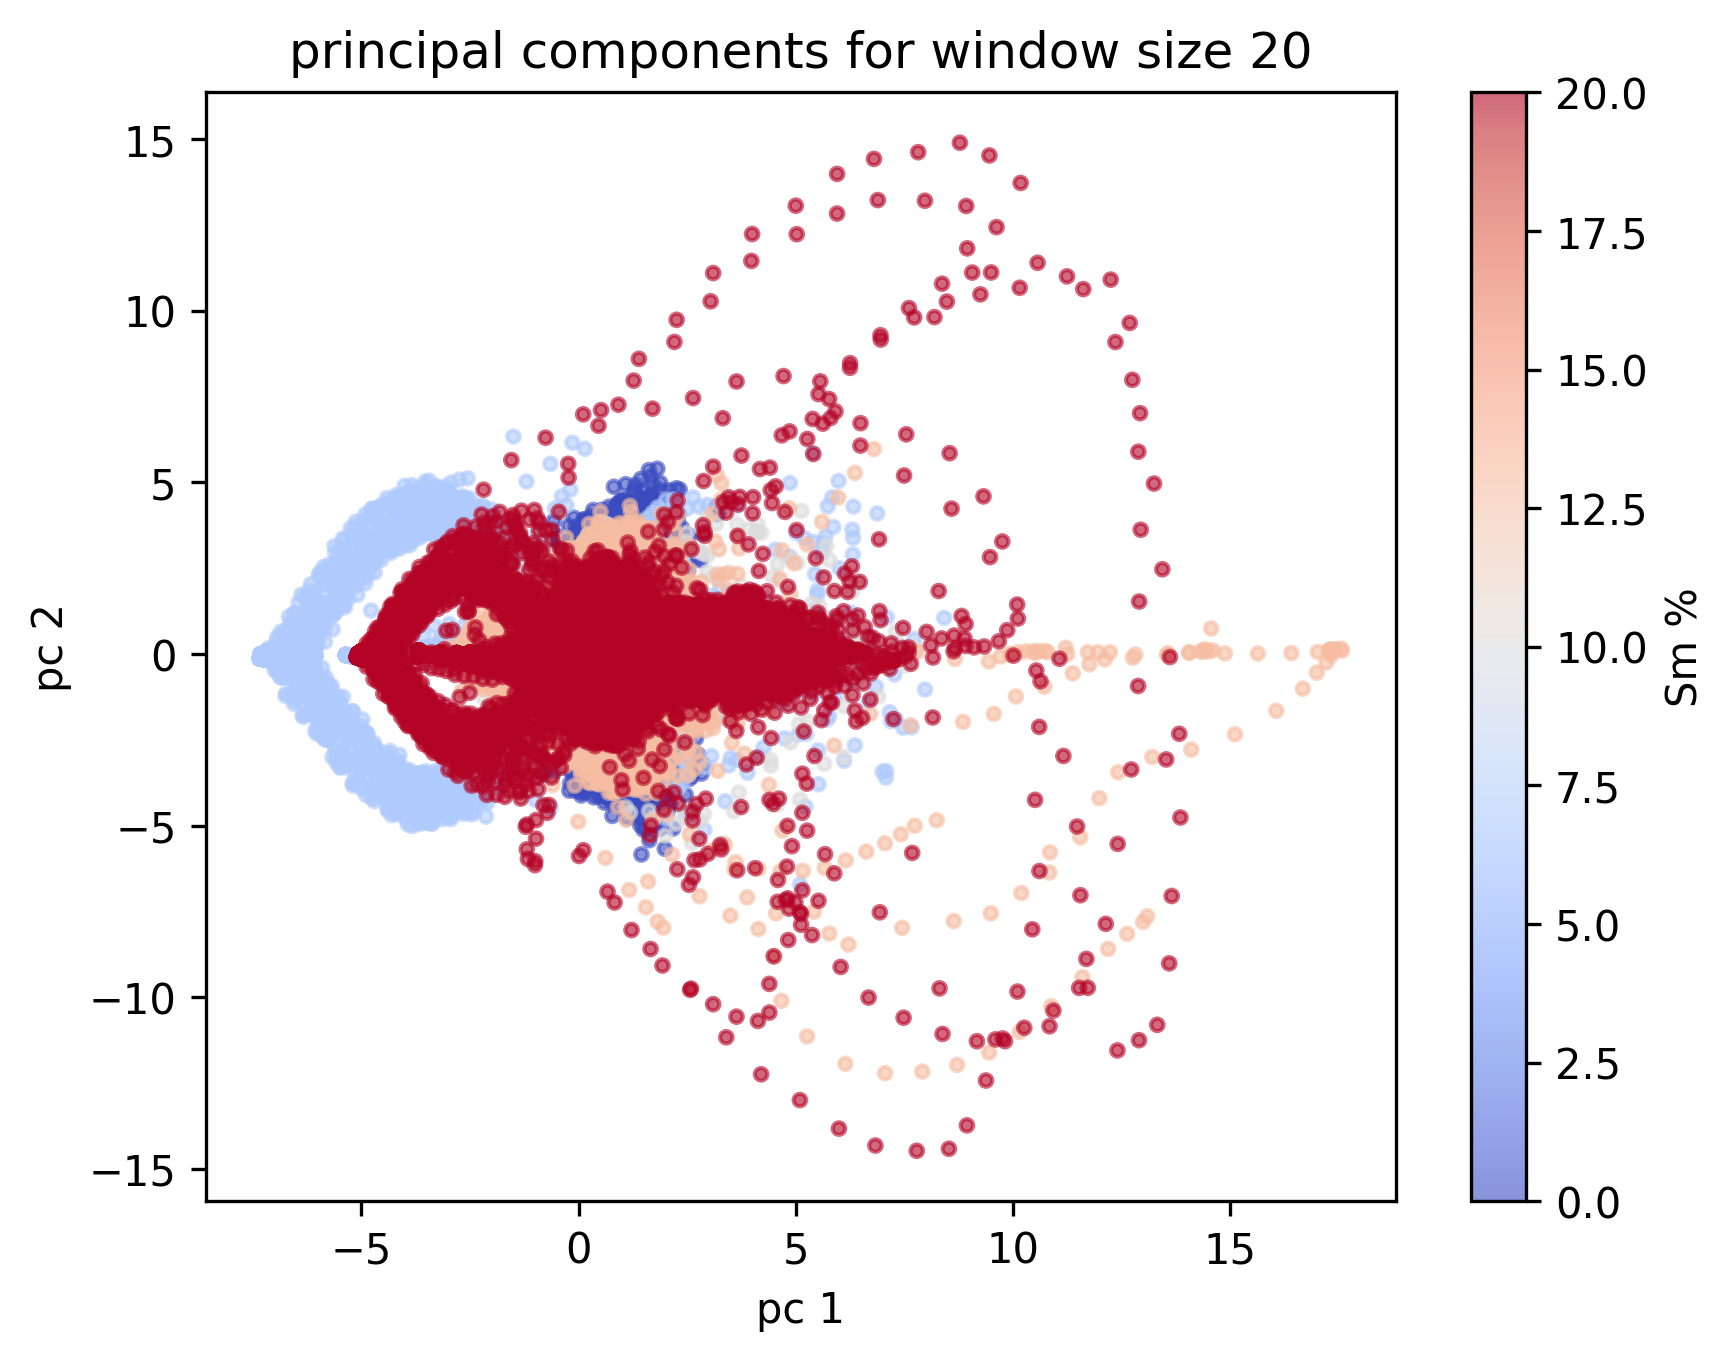

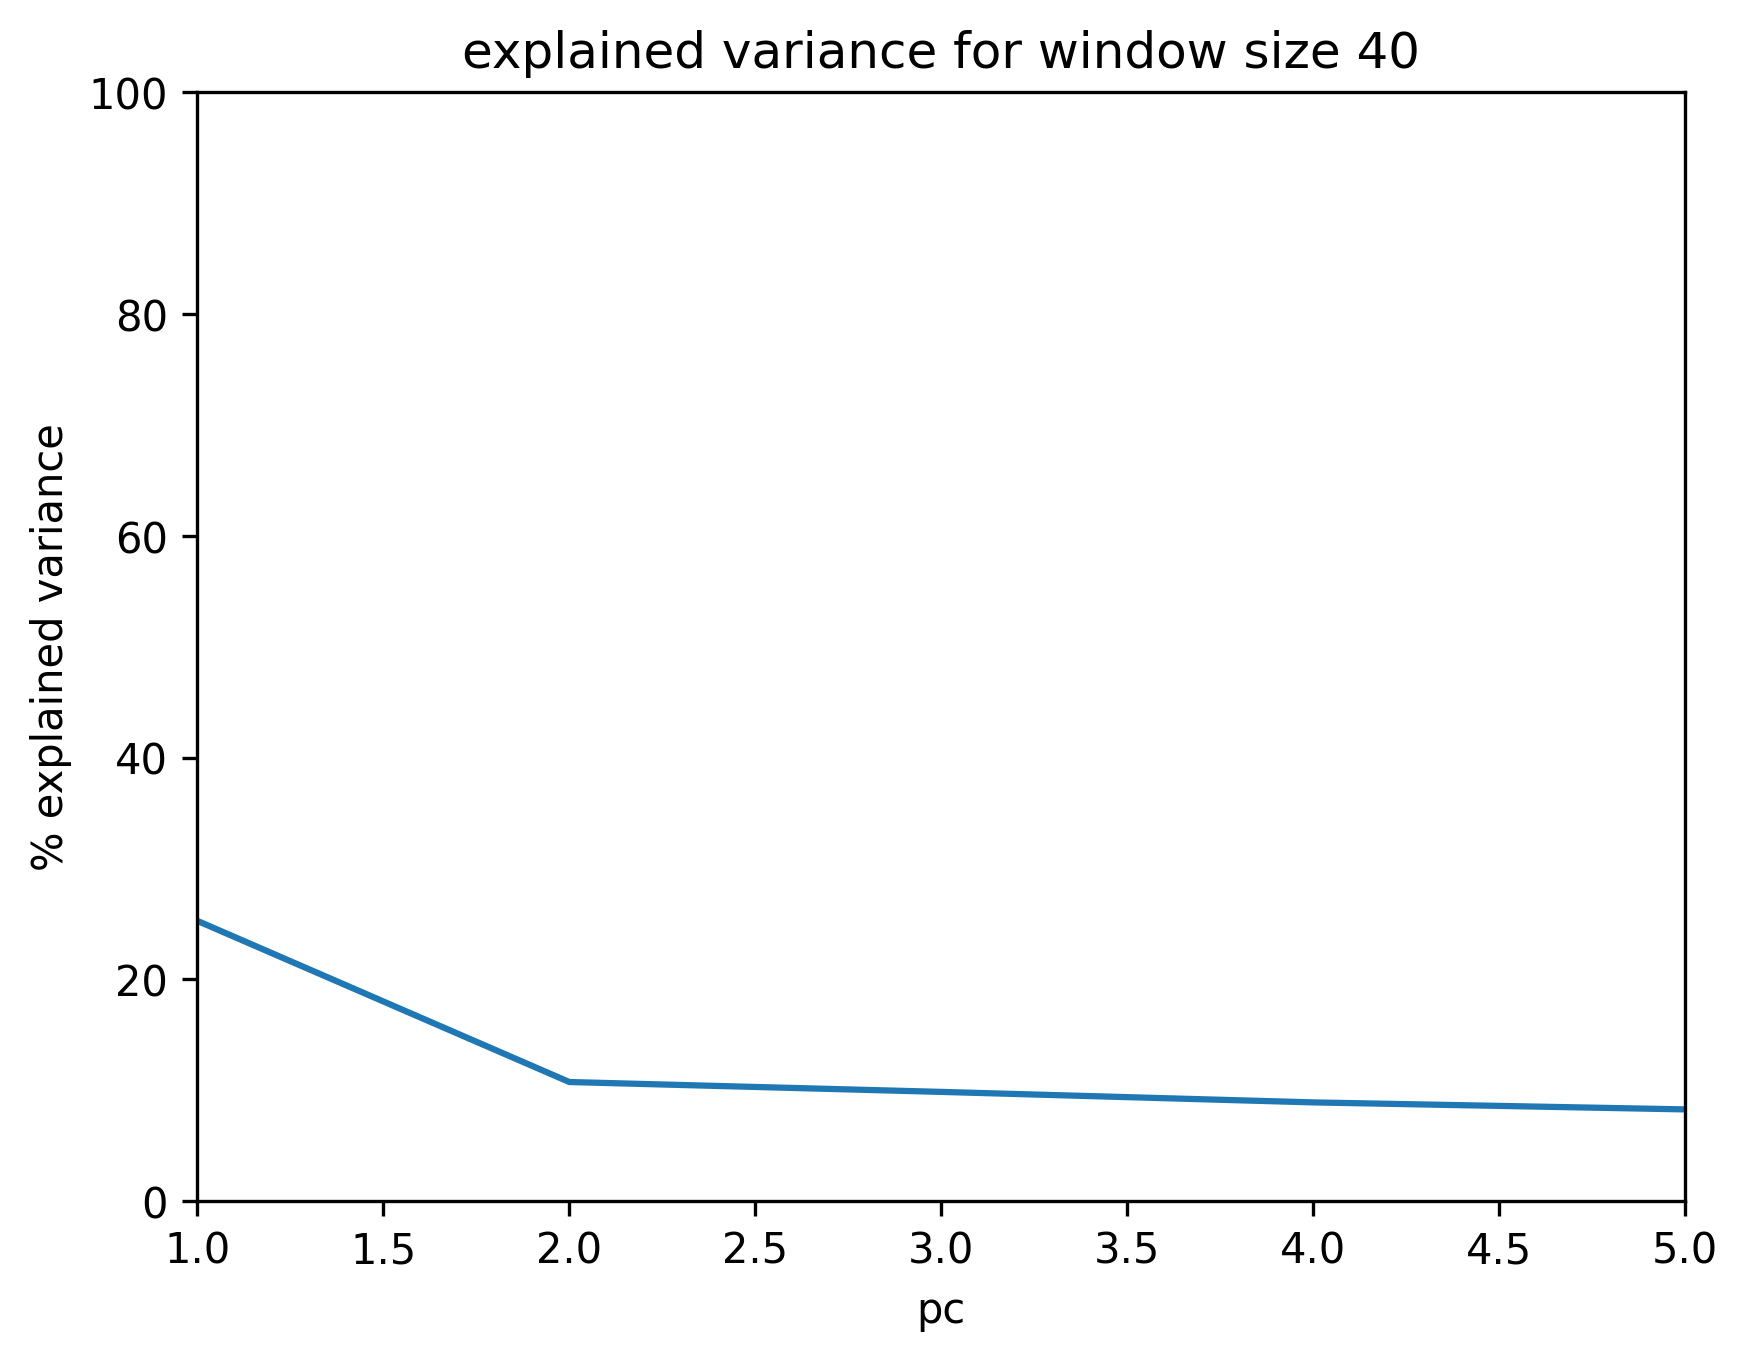

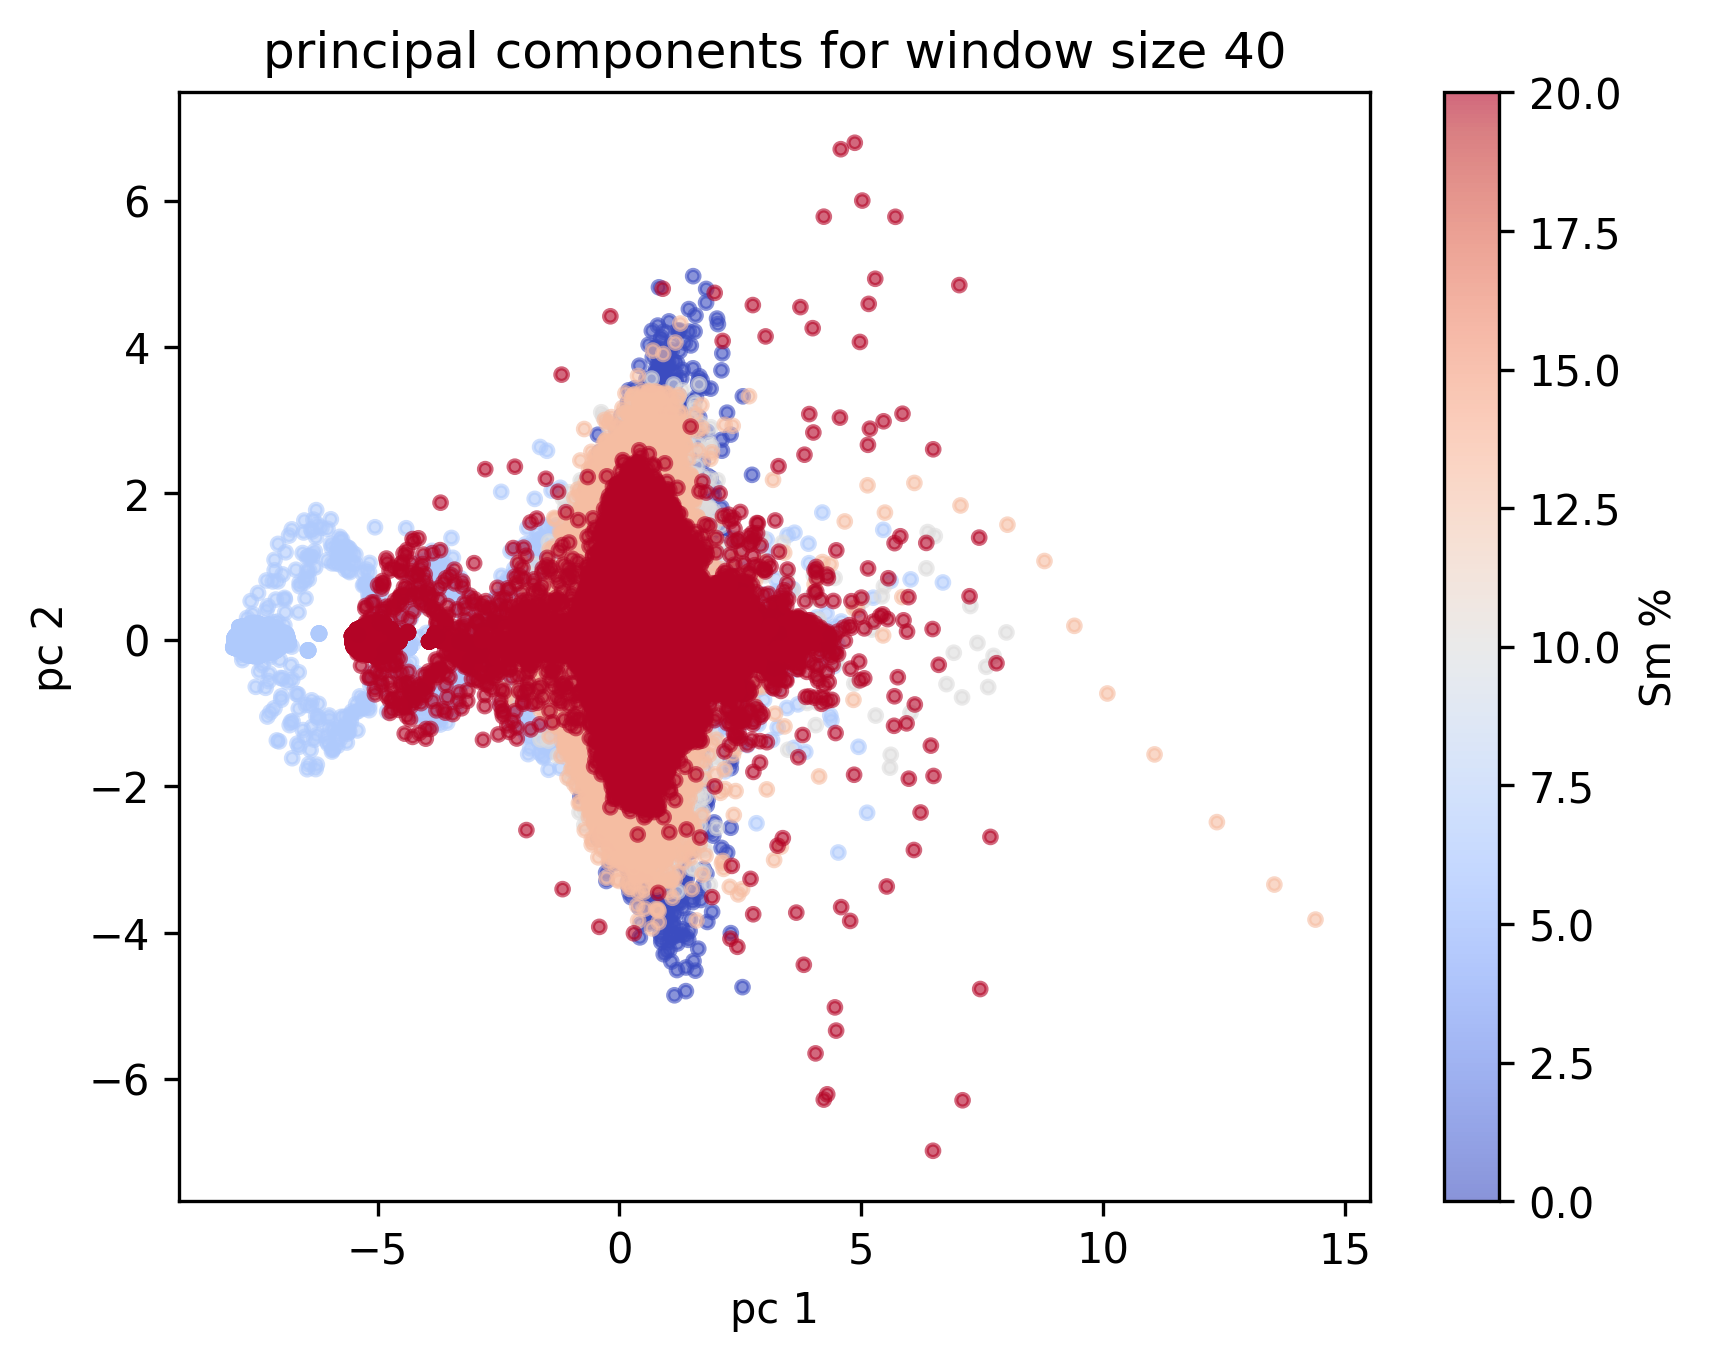

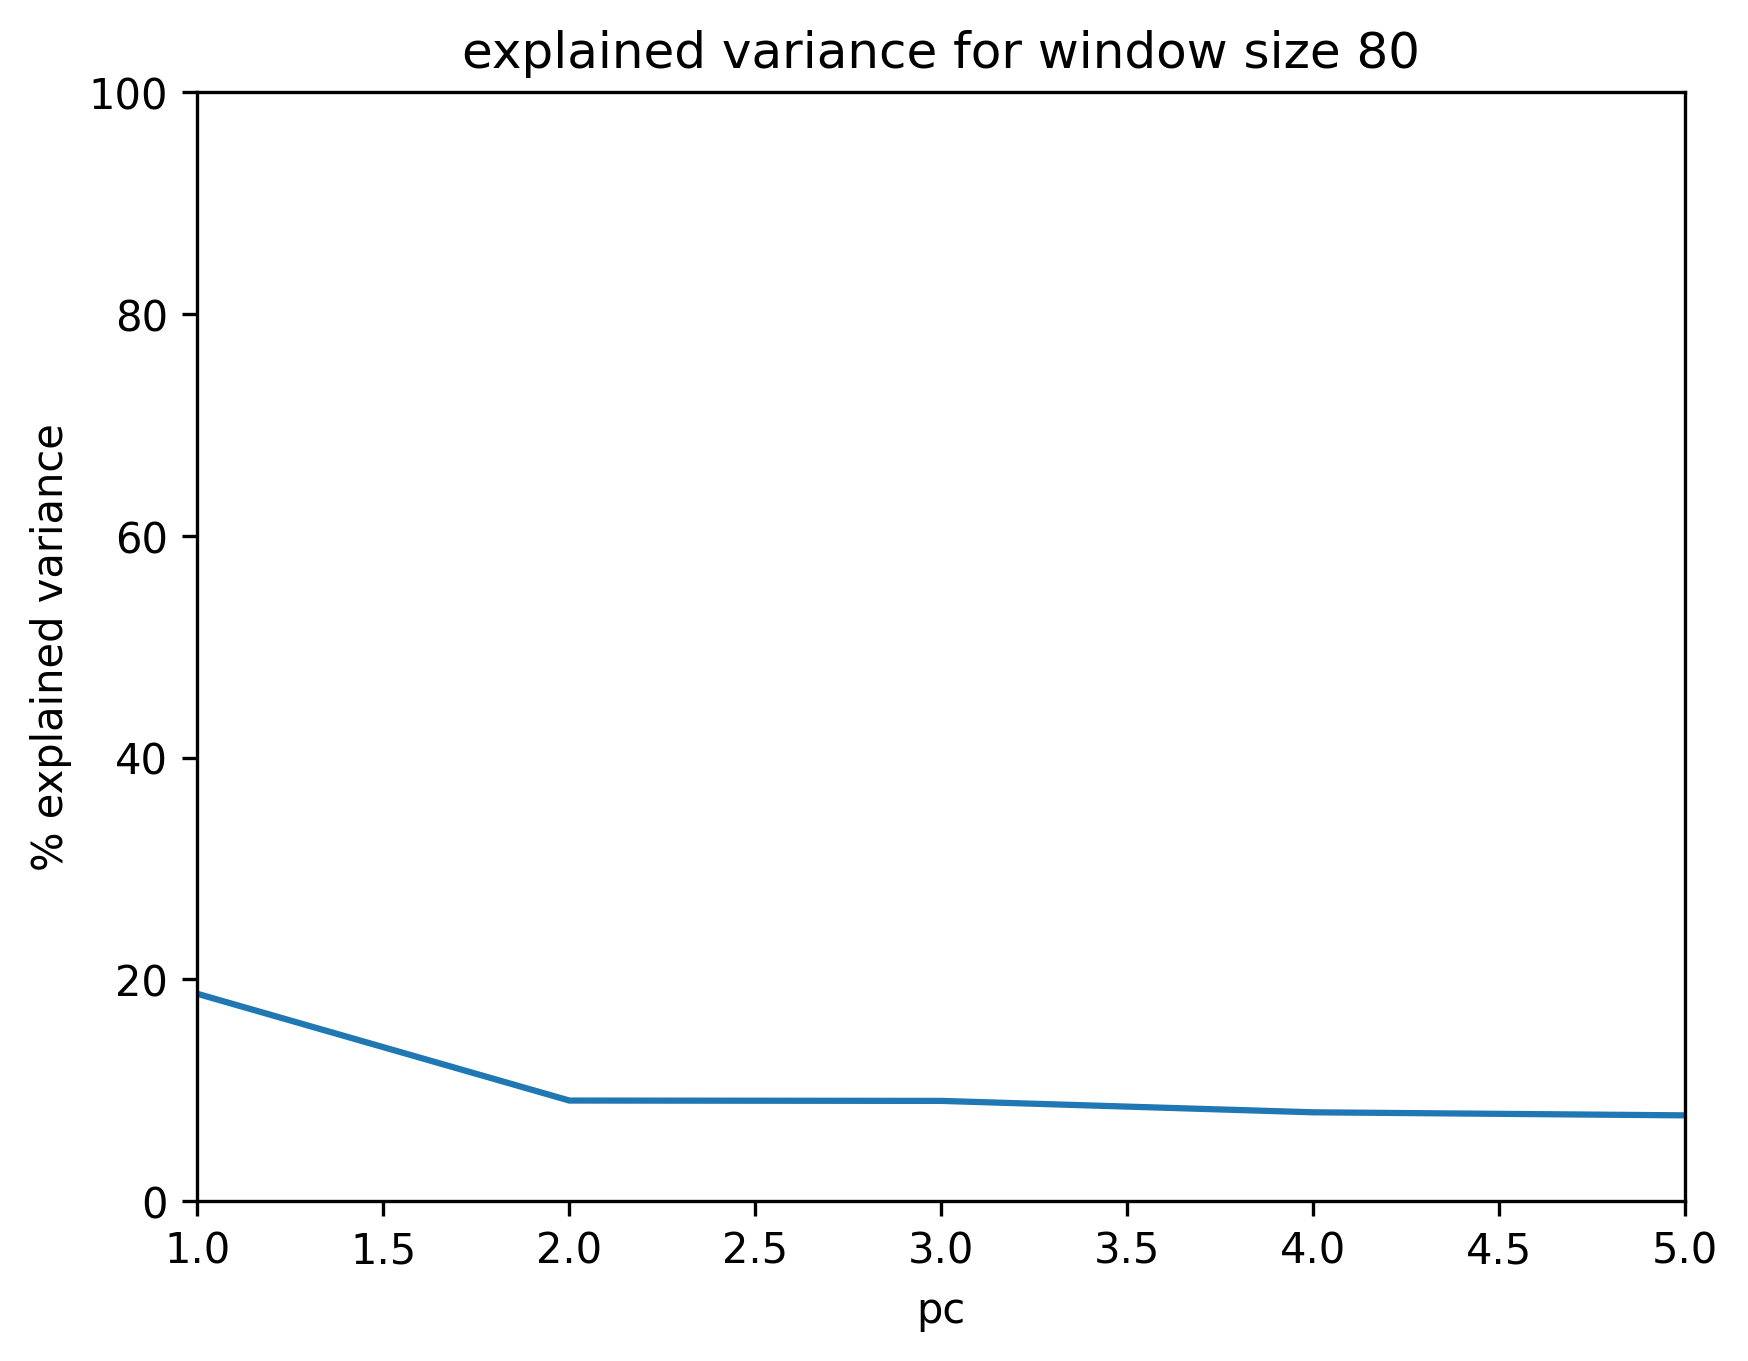

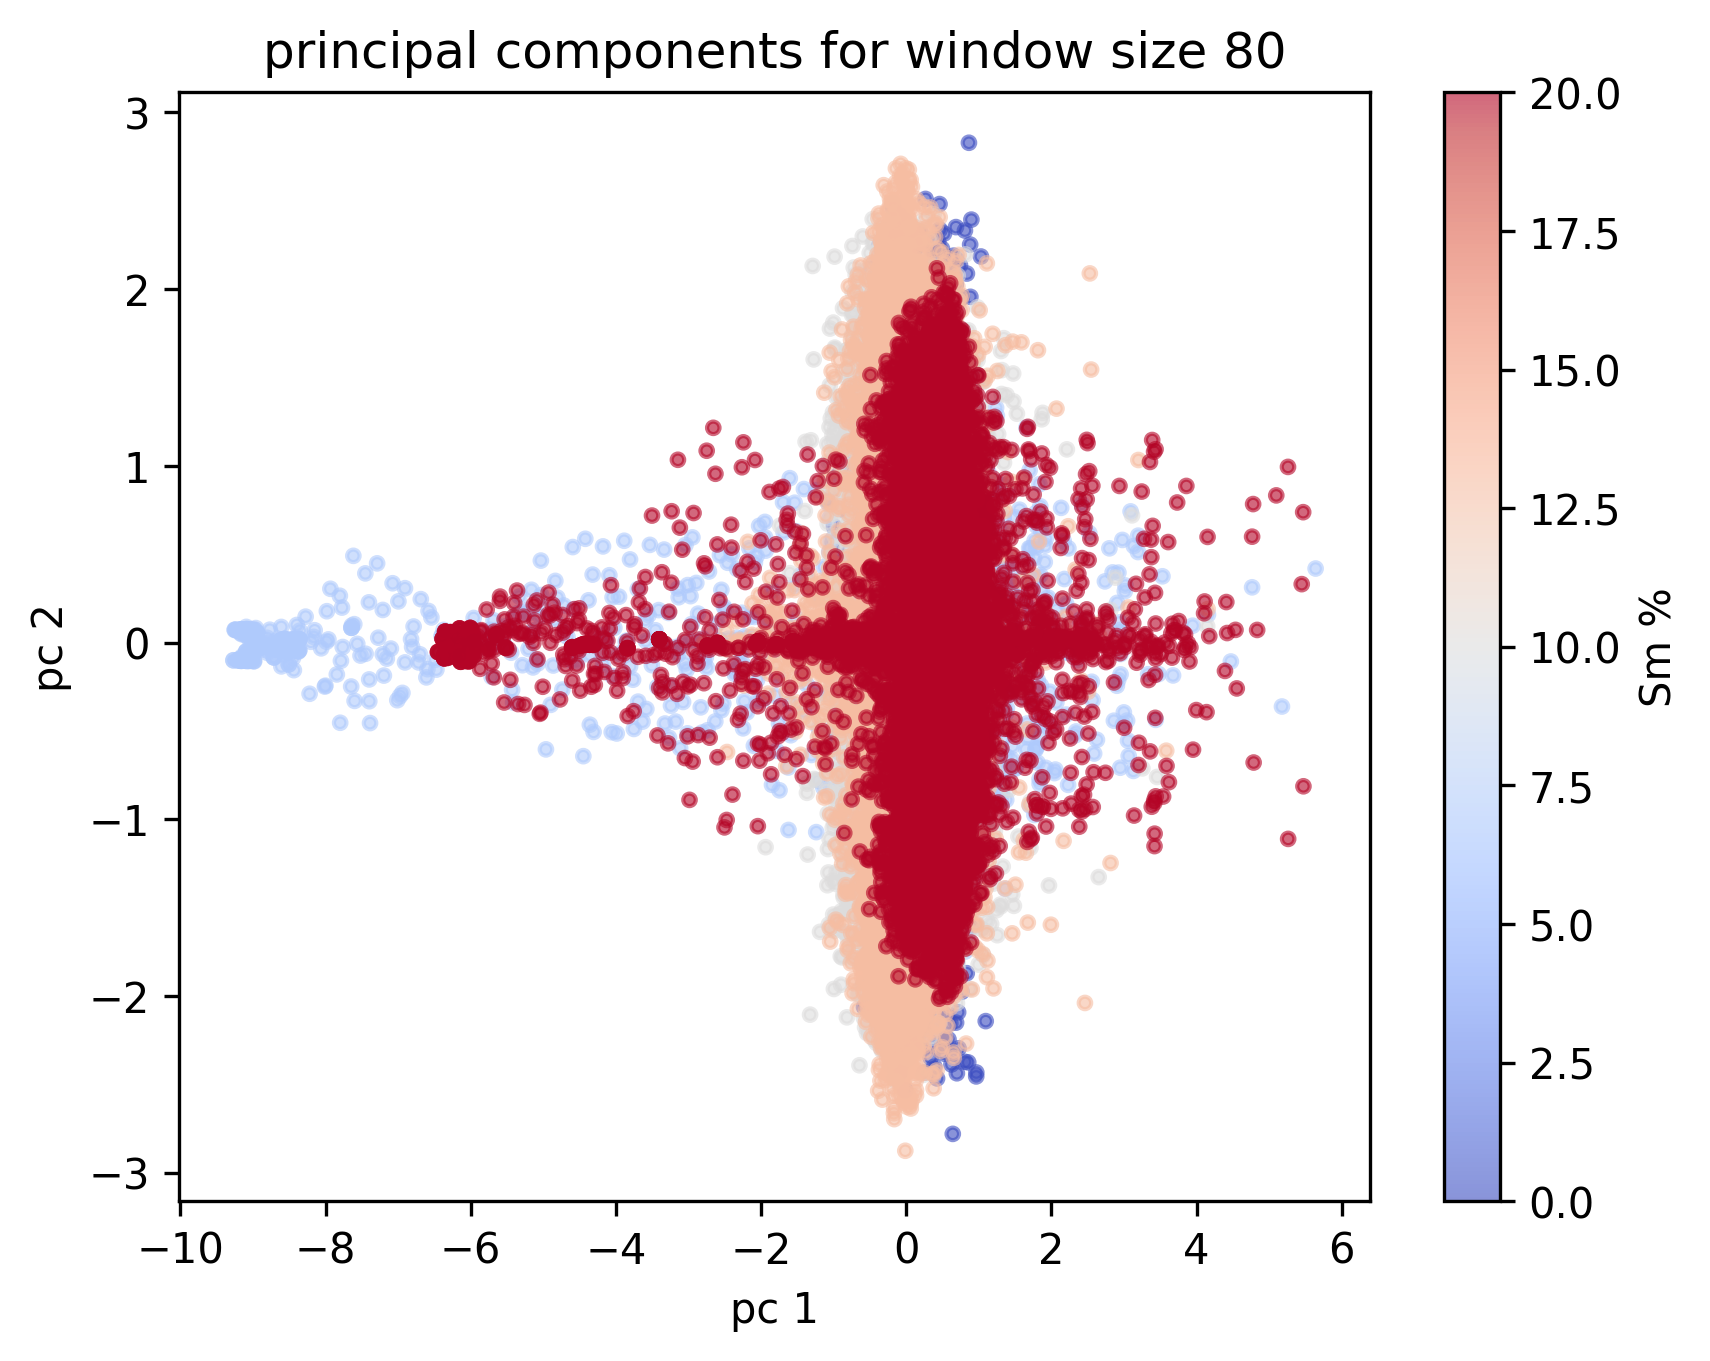

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import rcParams
import joblib
rcParams['figure.dpi'] = 300

conc_target_map = {0:0, 7:1, 10:2, 13:3, 20:4}
target_conc_map = {0:0, 1:7, 2:10, 3:13, 4:20}

for window_size in [10, 20, 40, 80]:
    pc_kernel = joblib.load(f'/content/drive/MyDrive/2025_Hackathon/Data/CSV_data_hayden/window{window_size}_pc_kernel.joblib')
    data = pd.read_csv(f"/content/drive/MyDrive/2025_Hackathon/Data/CSV_data_hayden/window{window_size}_dataset.csv", header=0, index_col=0, sep='\t')
    fig, ax = plt.subplots()
    ax.plot(np.arange(1, pc_kernel.explained_variance_ratio_.shape[0]+1), pc_kernel.explained_variance_ratio_*100)
    ax.set_xlim((1, 5))
    ax.set_ylim((0, 100))
    ax.set_ylabel('% explained variance')
    ax.set_xlabel('pc')
    ax.set_title(f'explained variance for window size {window_size}')
    fig.savefig(f"/content/drive/MyDrive/2025_Hackathon/Data/CSV_data_hayden/window{window_size}_ev.png", bbox_inches='tight')

    transformed_dat = pc_kernel.transform(data[data.columns[:-1]].to_numpy())
    fig, ax = plt.subplots()
    c = [target_conc_map[i] for i in data['target']]
    art = ax.scatter(transformed_dat[:,0], transformed_dat[:,1], c=c, cmap='coolwarm', marker='.', alpha=0.6)
    fig.colorbar(art, cmap='coolwarm', label='Sm %')
    ax.set_xlabel('pc 1')
    ax.set_ylabel('pc 2')
    ax.set_title(f'principal components for window size {window_size}')
    fig.savefig(f"/content/drive/MyDrive/2025_Hackathon/Data/CSV_data_hayden/window{window_size}_pc1pc2.png", bbox_inches='tight')

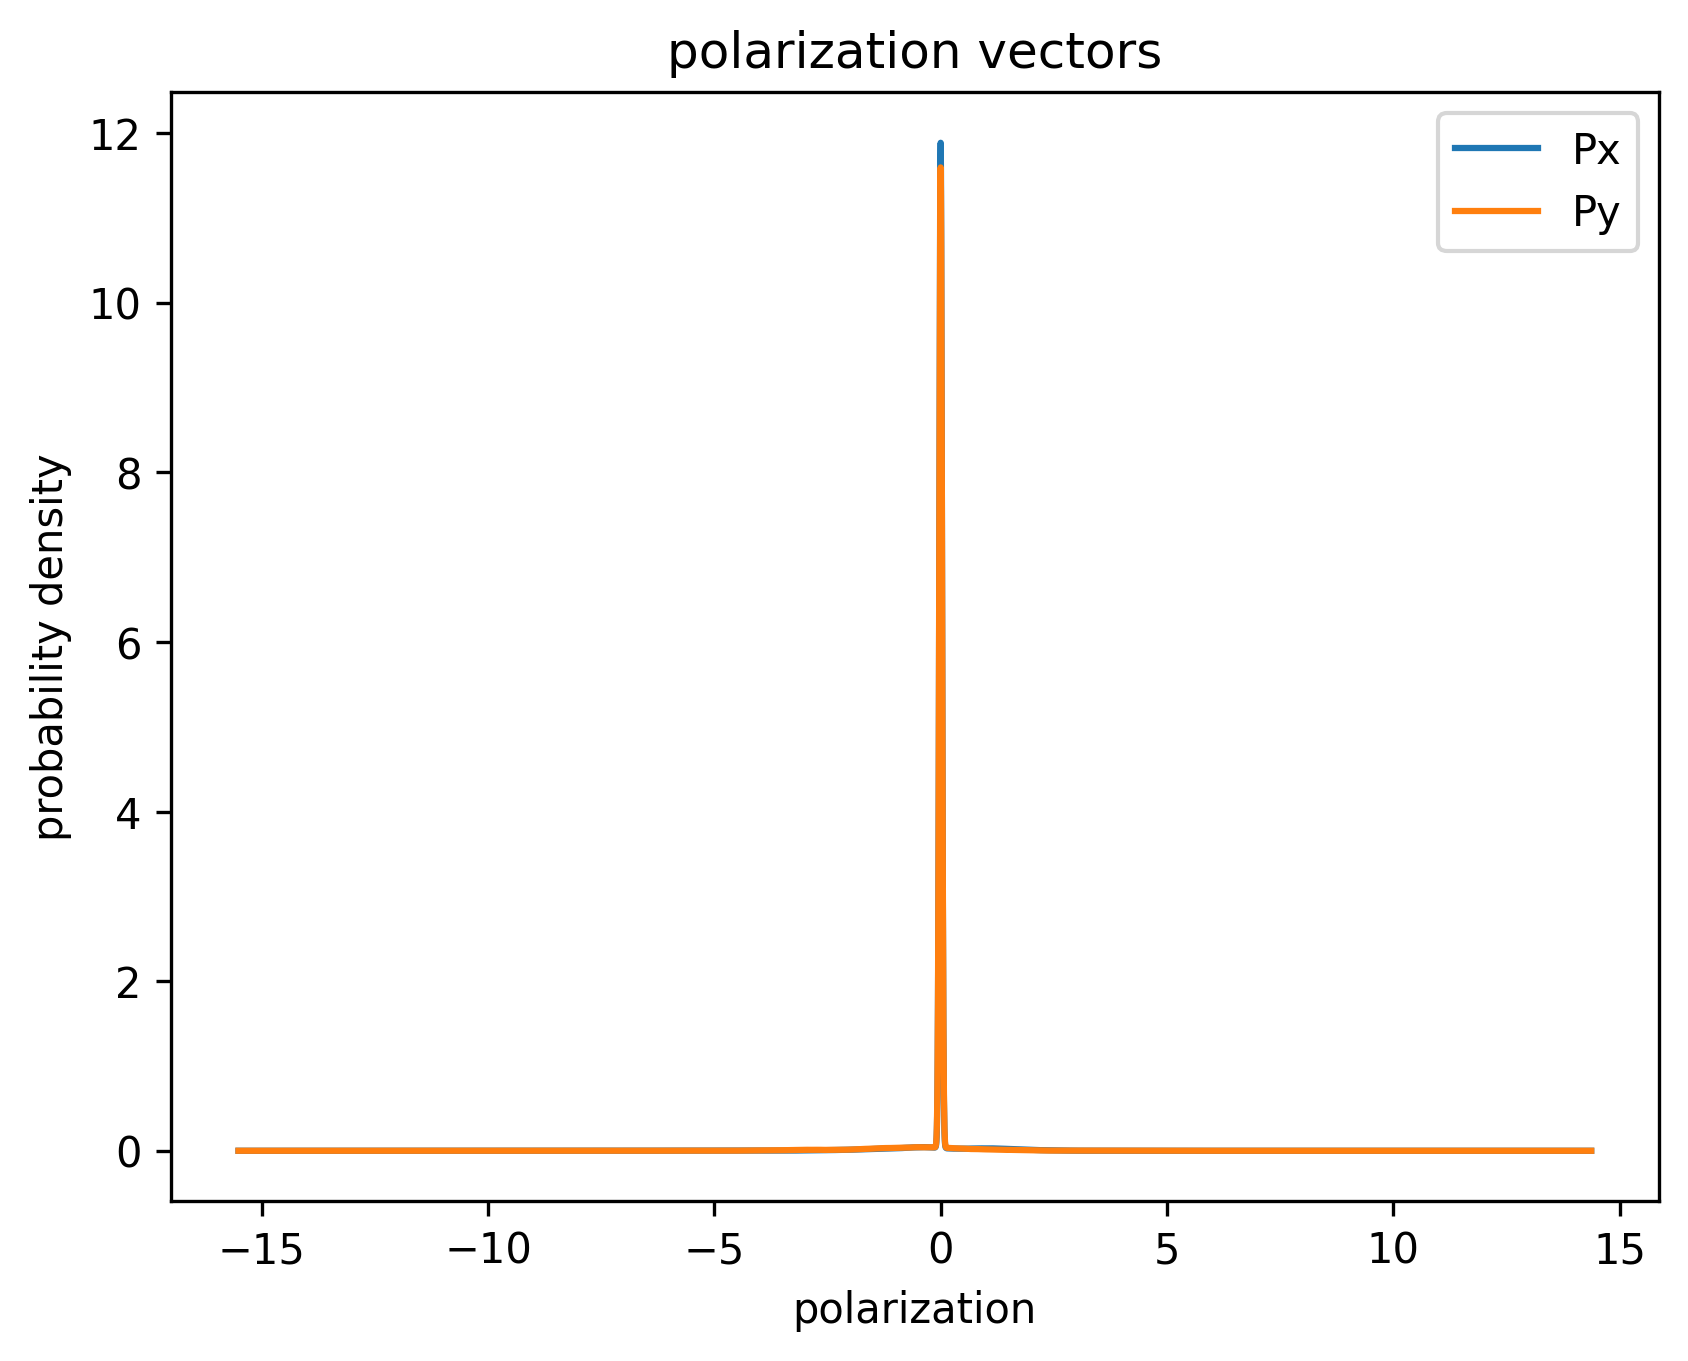

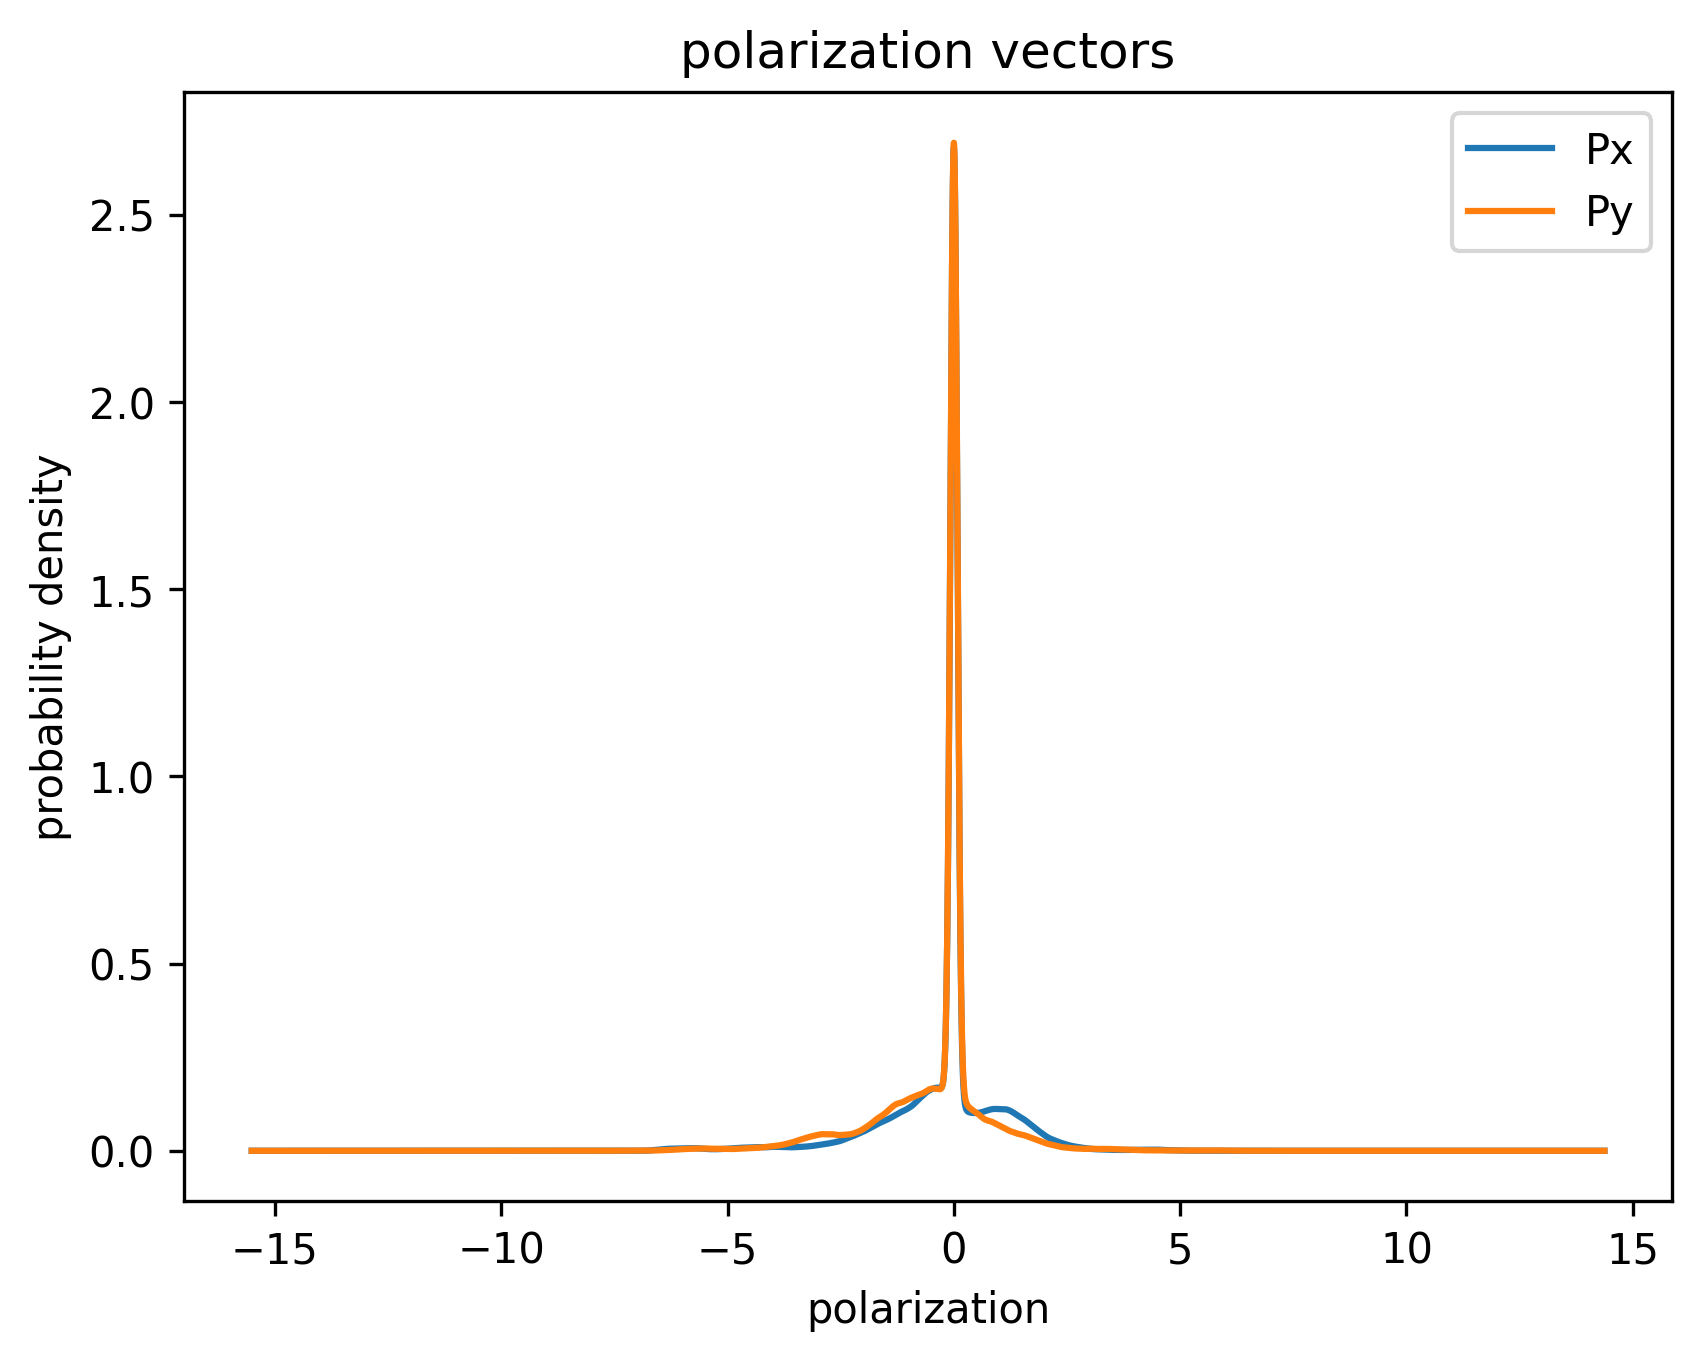

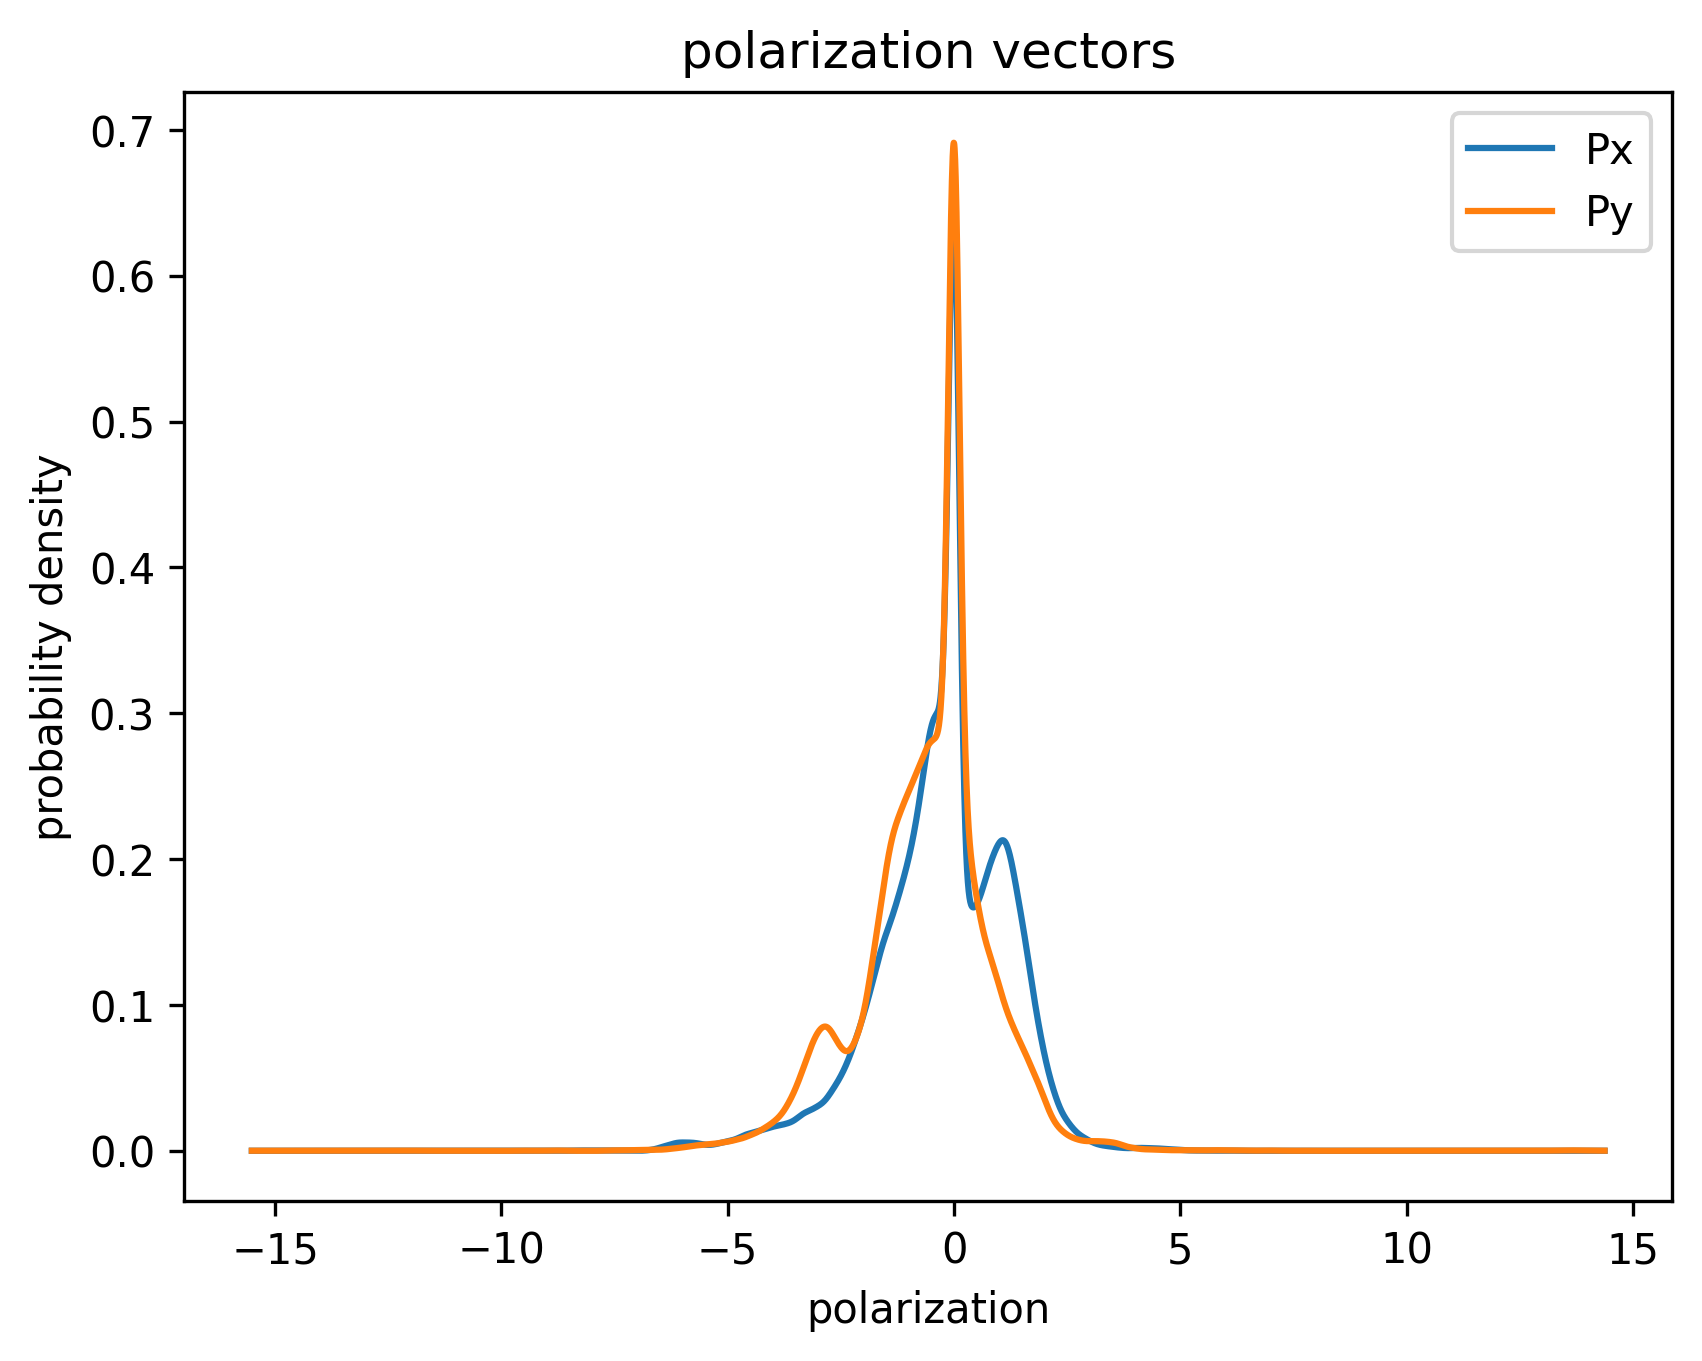

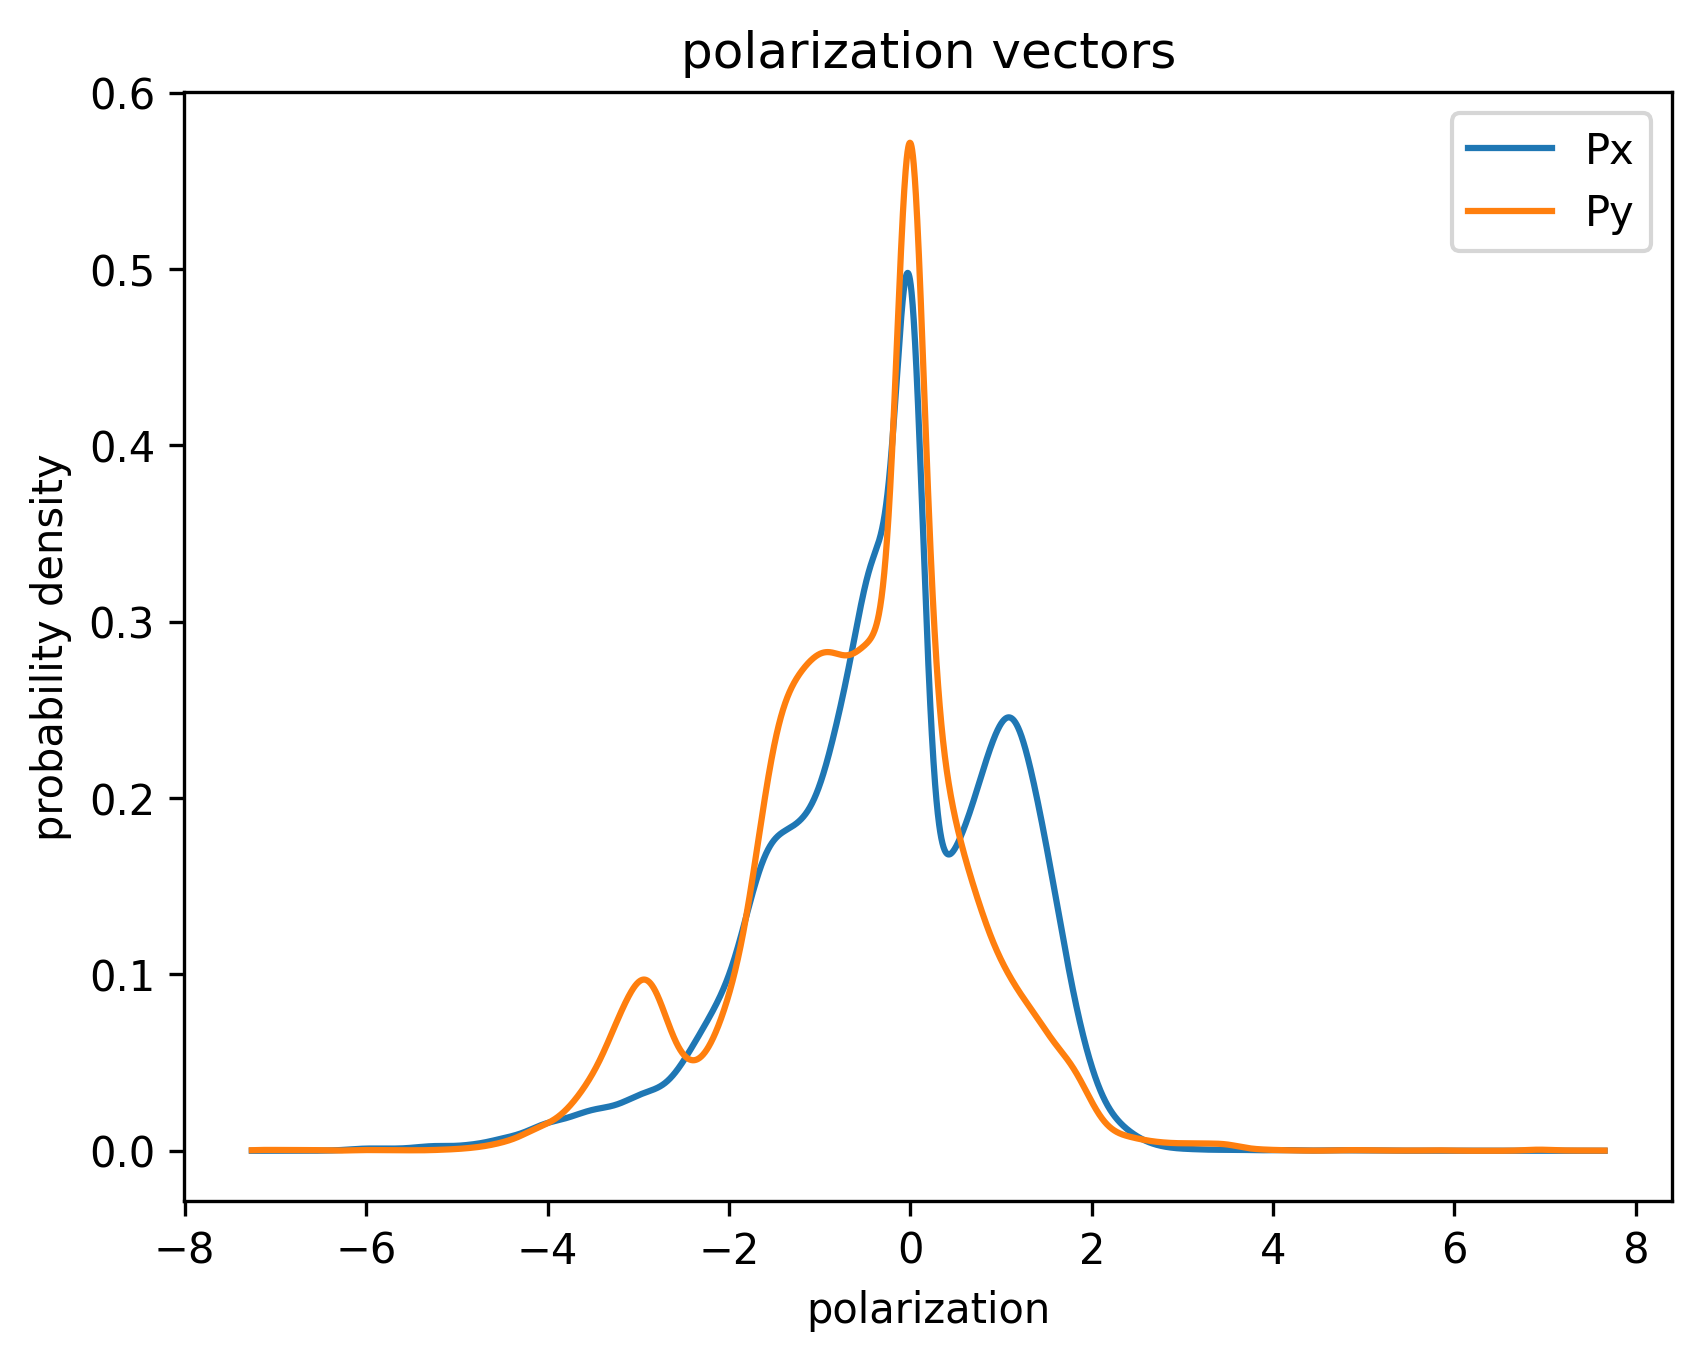

In [ ]:
from scipy.stats import gaussian_kde
for window_size in [10, 20, 40, 80]:
    data = pd.read_csv(f"/content/drive/MyDrive/2025_Hackathon/Data/CSV_data_hayden/window{window_size}_dataset.csv", header=0, index_col=0, sep='\t')
    px_kernel = gaussian_kde(data['Px'])
    py_kernel = gaussian_kde(data['Py'])
    px_range = [np.min(data['Px']), np.max(data['Px'])]
    py_range = [np.min(data['Py']), np.max(data['Py'])]
    ranges = np.array([px_range, py_range])
    x = np.linspace(np.min(ranges[:,0]), np.max(ranges[:,1]), 5000)

    fig, ax = plt.subplots()
    ax.plot(x, px_kernel([x]), label='Px')
    ax.plot(x, py_kernel([x]), label='Py')
    ax.set_xlabel('polarization')
    ax.set_ylabel('probability density')
    ax.set_title('polarization vectors')
    ax.legend()
    fig.savefig(f"/content/drive/MyDrive/2025_Hackathon/Data/CSV_data_hayden/window{window_size}_polarization.png", bbox_inches='tight')